# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Processing

In [2]:
price = pd.read_csv('C:\\Users\\lzh-a\\Desktop\\DA\\melb_data.csv')
pd.set_option('display.max_columns', None)
price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
price['Date'] = pd.to_datetime(price['Date'])

In [5]:
price.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
price.drop(price.loc[price['Rooms'] < price['Bedroom2']].index, inplace = True)

In [7]:
price.drop(price.loc[price['Bedroom2'] == 0].index, inplace = True)

In [8]:
price.drop(price.loc[price['Bathroom'] == 0].index, inplace = True)

# Data Visualization

## 1. Overview

### 1.1 Correlation between price and other paramaters

<AxesSubplot:>

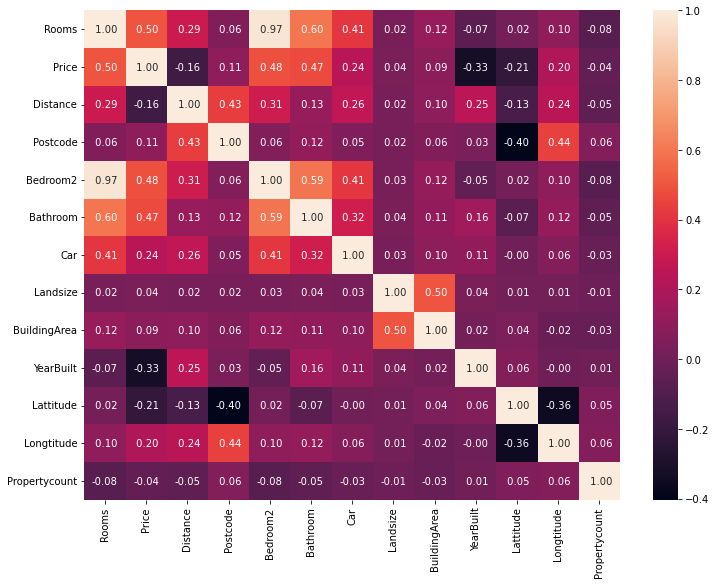

In [9]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(price.corr(), annot = True, fmt = ' .2f')

### 1.2 Median price trend

In [10]:
price_median = price.groupby(['Date'])['Price'].agg('median').reset_index(name = 'Median')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

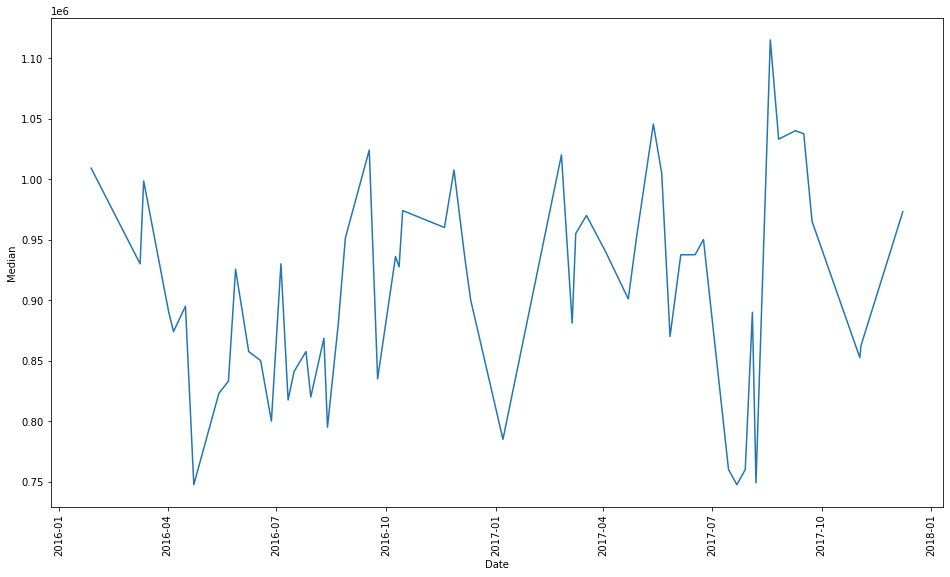

In [11]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_median['Date'], y = price_median['Median'])
plt.xticks(rotation = 90)

In [12]:
price_median_ty = price.groupby(['Date','Type'])['Price'].agg('median').reset_index(name = 'Median_ty')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

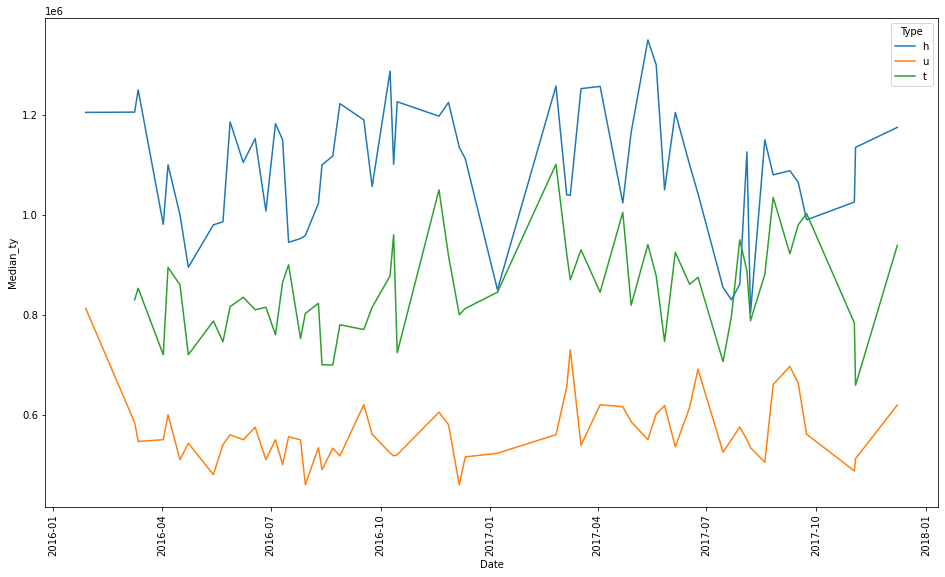

In [13]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_median_ty['Date'], y = price_median_ty['Median_ty'], hue = price_median_ty['Type'])
plt.xticks(rotation = 90)

### 1.3 Median price distribution

In [14]:
price_med = price.groupby(['Suburb'])['Price'].agg('median').sort_values(ascending = False).reset_index(name = 'Median')

<AxesSubplot:xlabel='Median', ylabel='Count'>

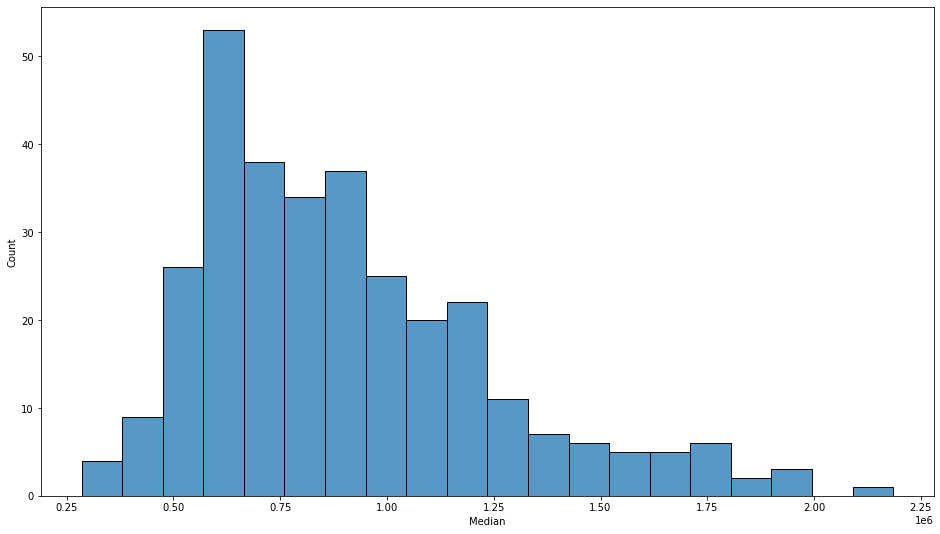

In [15]:
fig, axs = plt.subplots(figsize = (16,9))
sns.histplot(price_med['Median'], bins = 20)

### 1.4 Top 10 sold suburbs 

In [16]:
price_sub = price.groupby(['Suburb', 'Type'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')

In [17]:
price_subTol = price.groupby(['Suburb'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')

<AxesSubplot:xlabel='Suburb', ylabel='Count'>

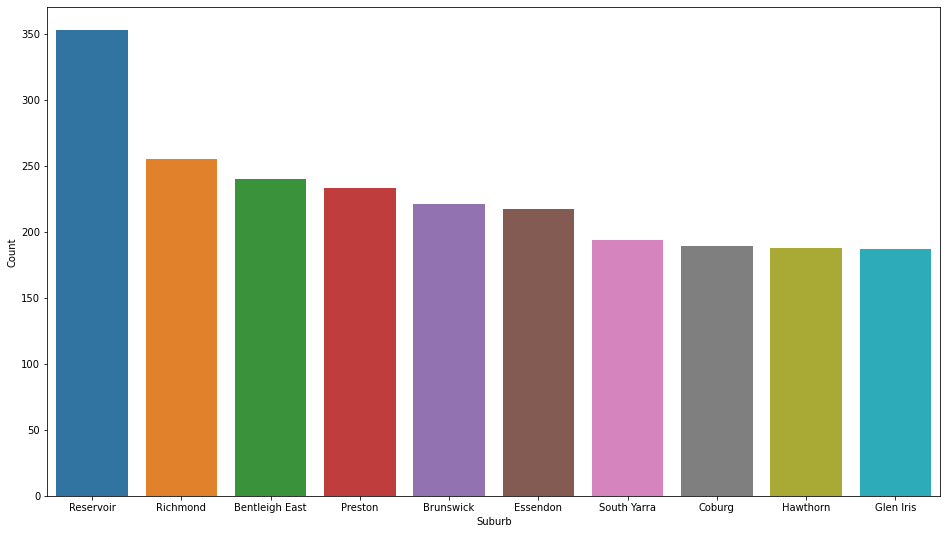

In [18]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_subTol['Suburb'][:10], y = price_subTol['Count'])

<AxesSubplot:xlabel='Suburb', ylabel='Count'>

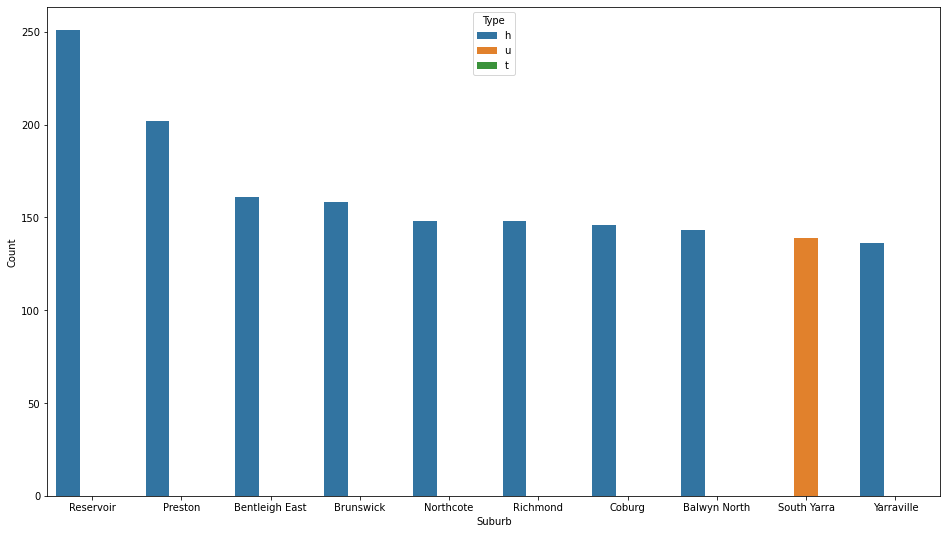

In [19]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_sub['Suburb'][:10], y = price_sub['Count'], hue = price_sub['Type'])

In [20]:
price_Res = price.set_index('Suburb').loc['Reservoir'].reset_index()
price_Ric = price.set_index('Suburb').loc['Richmond'].reset_index()
price_SY = price.set_index('Suburb').loc['South Yarra'].reset_index()

## 2. Reservoir 

### 2.1 Median price trend

In [21]:
price_Res_median = price_Res.groupby(['Date'])['Price'].agg('median').reset_index(name = 'ResMedian')

(array([16892., 16983., 17075., 17167., 17257., 17348., 17440., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

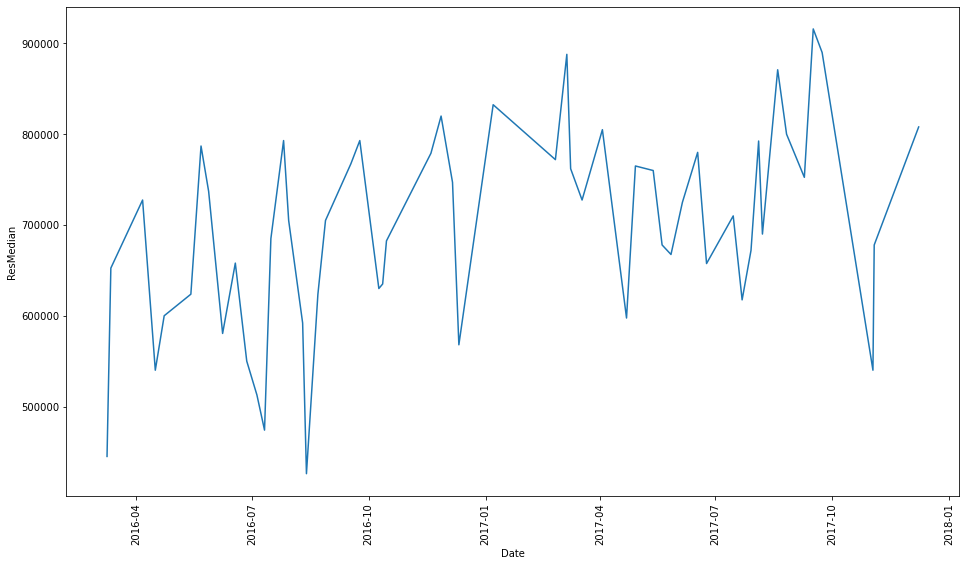

In [22]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_Res_median['Date'], y = price_Res_median['ResMedian'])
plt.xticks(rotation = 90)

In [23]:
price_Resm = pd.merge(price_median, price_Res_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

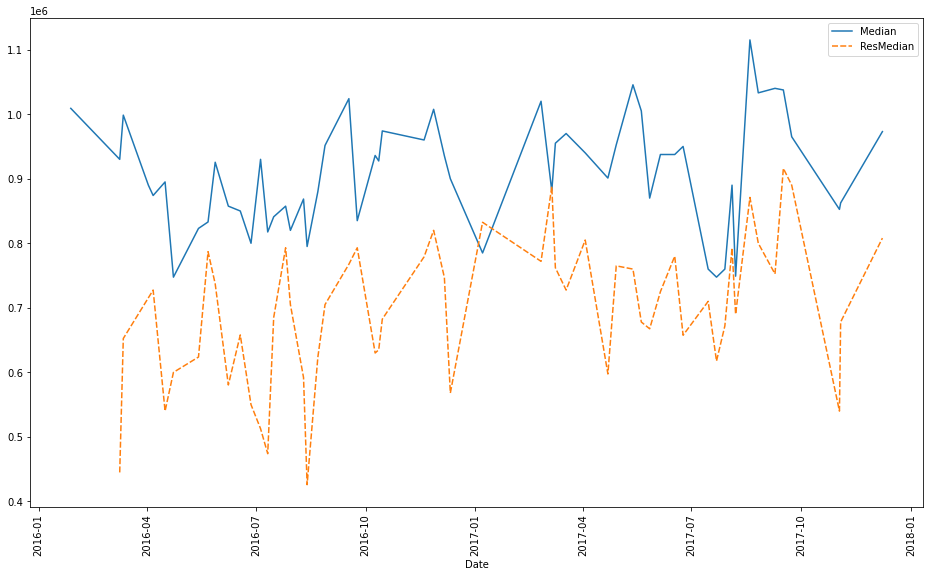

In [24]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_Resm)
plt.xticks(rotation = 90)

### 2.2 Number of property sold during the period

In [25]:
price_Res_count = price_Res.groupby(['Date'])['Address'].count().reset_index(name = 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, '2016-03-09T00:00:00.000000000'),
  Text(1, 0, '2016-03-12T00:00:00.000000000'),
  Text(2, 0, '2016-04-06T00:00:00.000000000'),
  Text(3, 0, '2016-04-16T00:00:00.000000000'),
  Text(4, 0, '2016-04-23T00:00:00.000000000'),
  Text(5, 0, '2016-05-14T00:00:00.000000000'),
  Text(6, 0, '2016-05-22T00:00:00.000000000'),
  Text(7, 0, '2016-05-28T00:00:00.000000000'),
  Text(8, 0, '2016-06-08T00:00:00.000000000'),
  Text(9, 0, '2016-06-18T00:00:00.000000000'),
  Text(10, 0, '2016-06-27T00:00:00.000000000'),
  Text(11, 0, '2016-07-05T00:00:00.000000000'),
  Text(12, 0, '2016-07-11T00:00:00.000000000'),
  Text(13, 0, '2016-07-16T00:00:00.000000000'),
  Text(14, 0, '2016-07-26T00:00:00.000000000'),
  Text(15, 0, '2016-07-30T00:00:

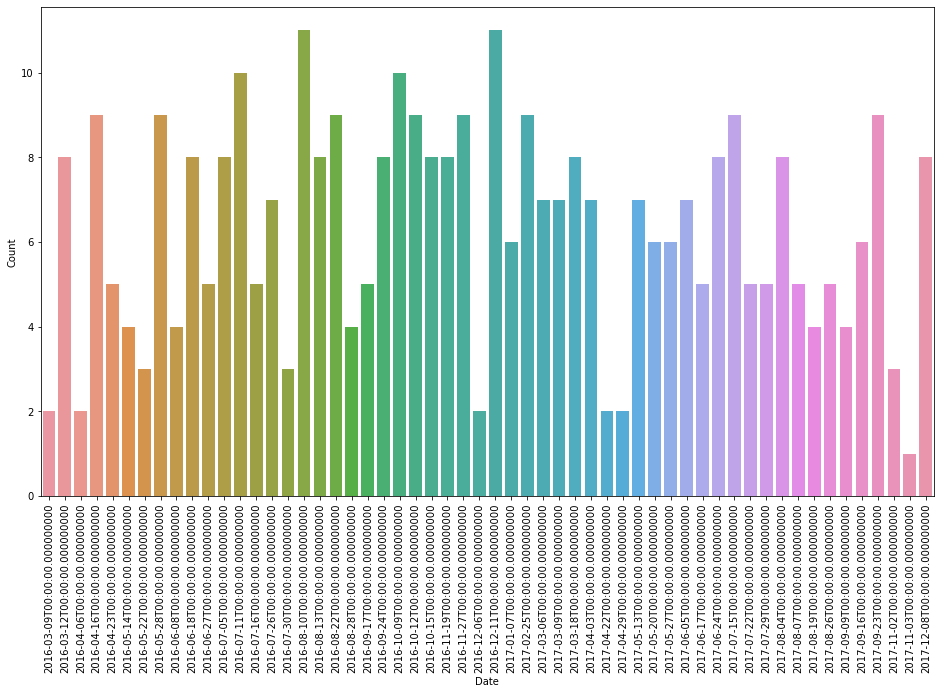

In [26]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_count['Date'], y = price_Res_count['Count'])
plt.xticks(rotation = 90)

### 2.3 Seller agent analysis

In [27]:
price_Res_sel = price_Res.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Barry'),
  Text(1, 0, 'Raine'),
  Text(2, 0, 'Nelson'),
  Text(3, 0, 'RW'),
  Text(4, 0, 'Ray'),
  Text(5, 0, 'McGrath'),
  Text(6, 0, 'hockingstuart'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'Love'),
  Text(9, 0, 'Stockdale'),
  Text(10, 0, 'Harrington'),
  Text(11, 0, 'HAR'),
  Text(12, 0, 'Fletchers'),
  Text(13, 0, 'Woodards'),
  Text(14, 0, 'Darren'),
  Text(15, 0, 'Purplebricks'),
  Text(16, 0, 'Alexkarbon'),
  Text(17, 0, 'Brad')])

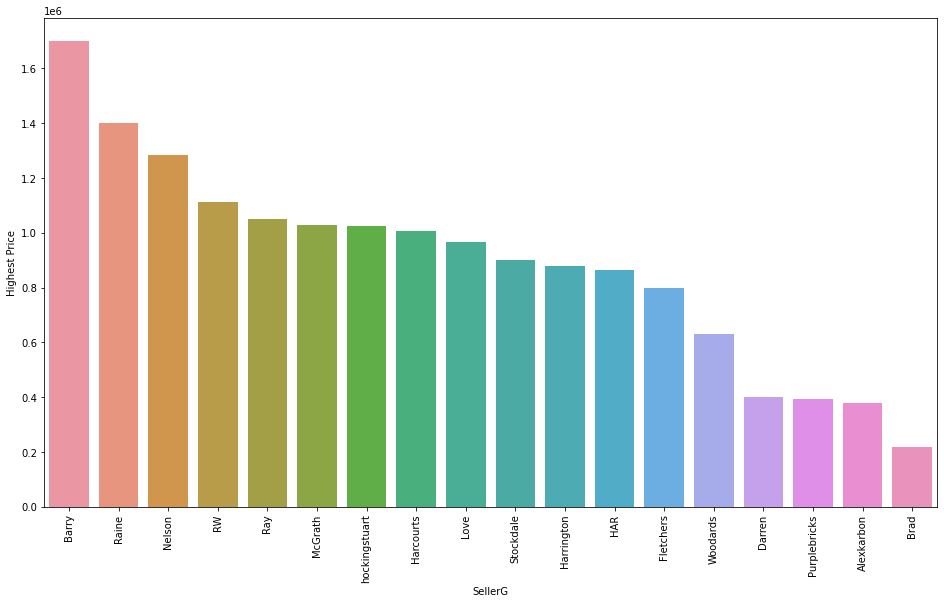

In [28]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_sel['SellerG'], y = price_Res_sel['Highest Price'])
plt.xticks(rotation = 90)

In [29]:
price_Res_sell = price_Res.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Brad'),
  Text(1, 0, 'Stockdale'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Love'),
  Text(4, 0, 'Barry'),
  Text(5, 0, 'Ray'),
  Text(6, 0, 'Nelson'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'Alexkarbon'),
  Text(9, 0, 'Purplebricks'),
  Text(10, 0, 'Darren'),
  Text(11, 0, 'RW'),
  Text(12, 0, 'McGrath'),
  Text(13, 0, 'Woodards'),
  Text(14, 0, 'Raine'),
  Text(15, 0, 'Fletchers'),
  Text(16, 0, 'HAR'),
  Text(17, 0, 'Harrington')])

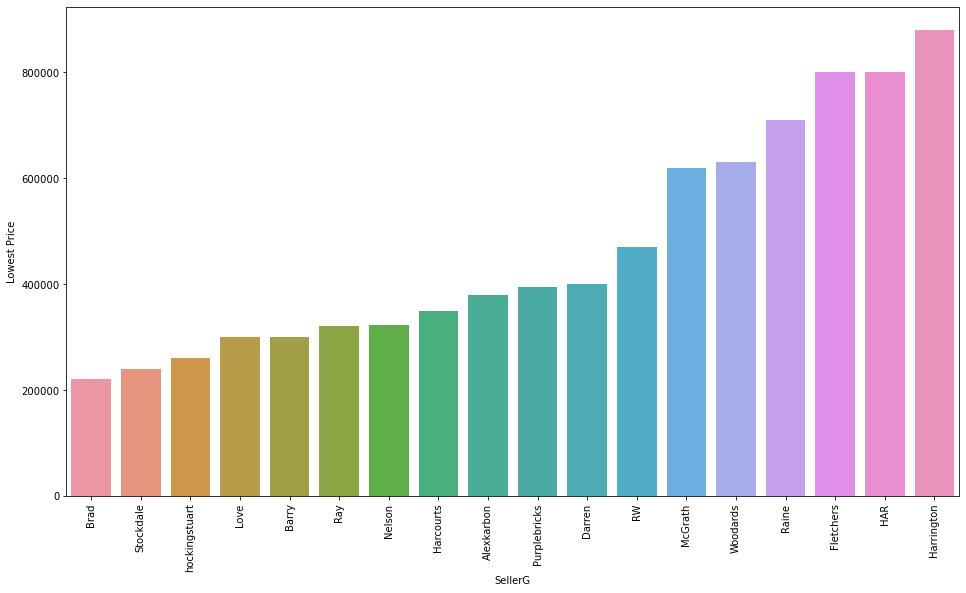

In [30]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_sell['SellerG'], y = price_Res_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [31]:
price_Res_selcount = price_Res.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Barry'),
  Text(1, 0, 'Nelson'),
  Text(2, 0, 'Ray'),
  Text(3, 0, 'Love'),
  Text(4, 0, 'hockingstuart'),
  Text(5, 0, 'Stockdale'),
  Text(6, 0, 'RW'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'McGrath'),
  Text(9, 0, 'HAR'),
  Text(10, 0, 'Raine'),
  Text(11, 0, 'Harrington'),
  Text(12, 0, 'Purplebricks'),
  Text(13, 0, 'Fletchers'),
  Text(14, 0, 'Darren'),
  Text(15, 0, 'Brad'),
  Text(16, 0, 'Woodards'),
  Text(17, 0, 'Alexkarbon')])

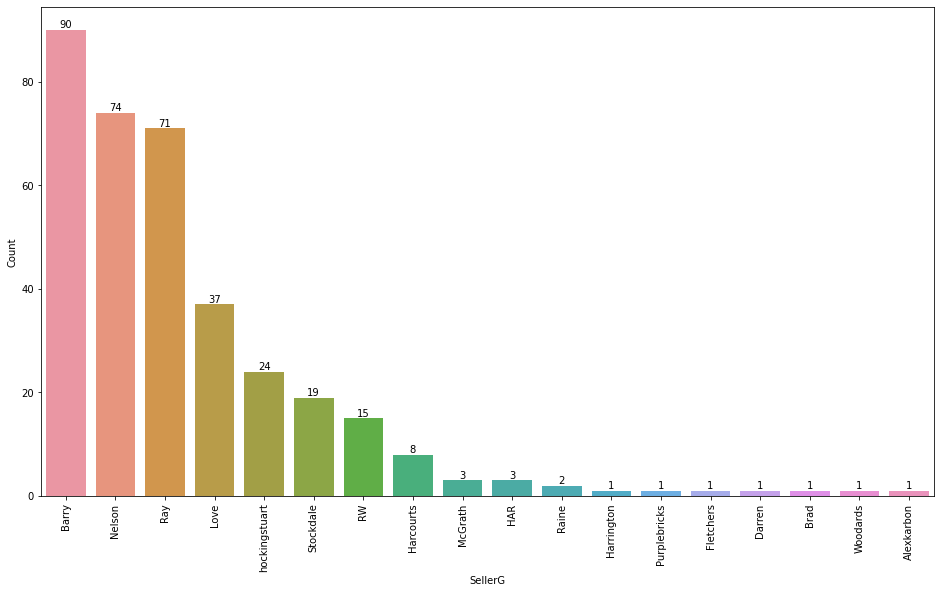

In [32]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_Res_selcount['SellerG'], y = price_Res_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

## 3. Richmond

### 3.1 Median price trend

In [33]:
price_Ric_median = price_Ric.groupby(['Date'])['Price'].agg('median').reset_index(name = 'RicMedian')

(array([16861., 16922., 16983., 17045., 17106., 17167., 17226., 17287.,
        17348., 17410., 17471.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

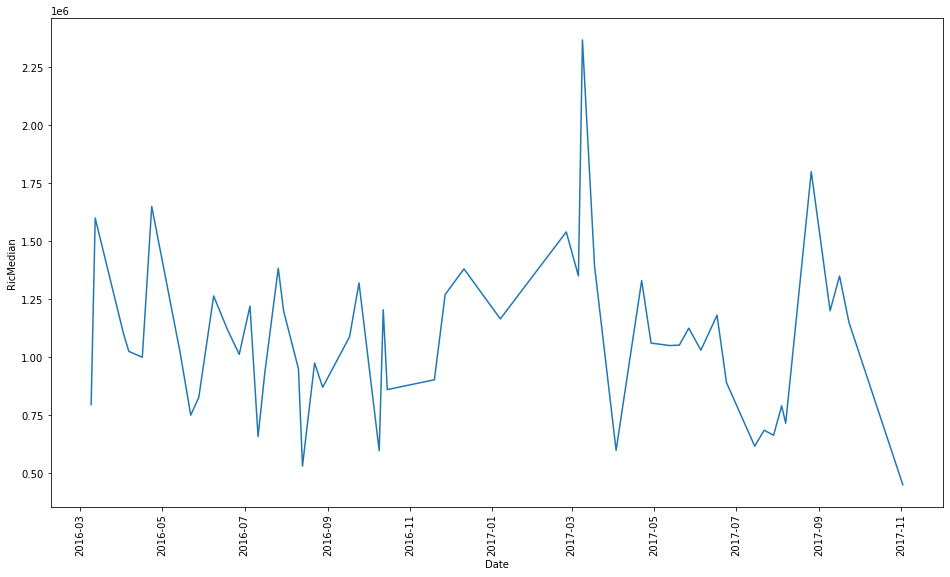

In [34]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_Ric_median['Date'], y = price_Ric_median['RicMedian'])
plt.xticks(rotation = 90)

In [35]:
price_Ricm = pd.merge(price_median, price_Ric_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

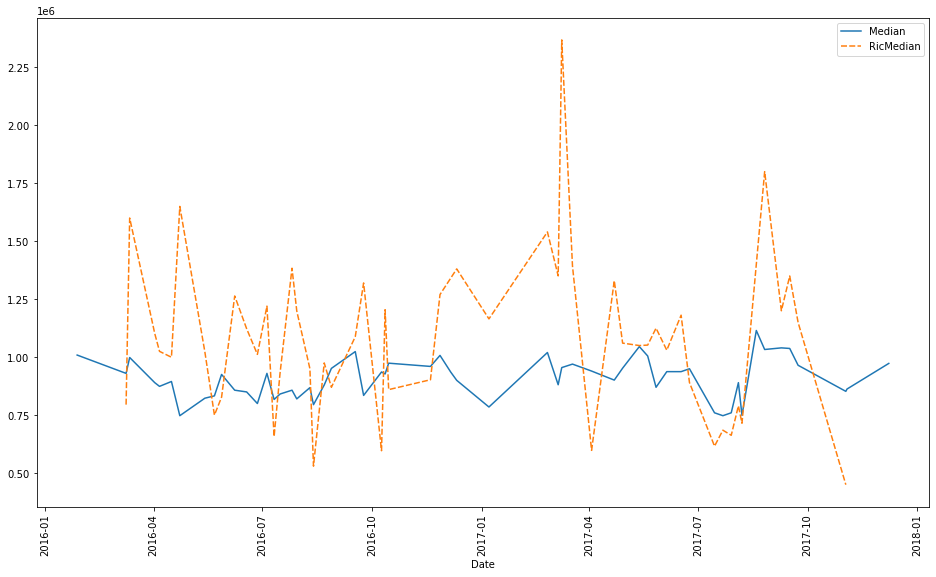

In [36]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_Ricm)
plt.xticks(rotation = 90)

### 3.2 Number of property sold during the period

In [37]:
price_Ric_count = price_Ric.groupby(['Date'])['Address'].count().reset_index(name = 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '2016-03-09T00:00:00.000000000'),
  Text(1, 0, '2016-03-12T00:00:00.000000000'),
  Text(2, 0, '2016-04-02T00:00:00.000000000'),
  Text(3, 0, '2016-04-06T00:00:00.000000000'),
  Text(4, 0, '2016-04-16T00:00:00.000000000'),
  Text(5, 0, '2016-04-23T00:00:00.000000000'),
  Text(6, 0, '2016-05-14T00:00:00.000000000'),
  Text(7, 0, '2016-05-22T00:00:00.000000000'),
  Text(8, 0, '2016-05-28T00:00:00.000000000'),
  Text(9, 0, '2016-06-08T00:00:00.000000000'),
  Text(10, 0, '2016-06-18T00:00:00.000000000'),
  Text(11, 0, '2016-06-27T00:00:00.000000000'),
  Text(12, 0, '2016-07-05T00:00:00.000000000'),
  Text(13, 0, '2016-07-11T00:00:00.000000000'),
  Text(14, 0, '2016-07-16T00:00:00.000000000'),
  Text(15, 0, '2016-07-26T00:00:00.000000000

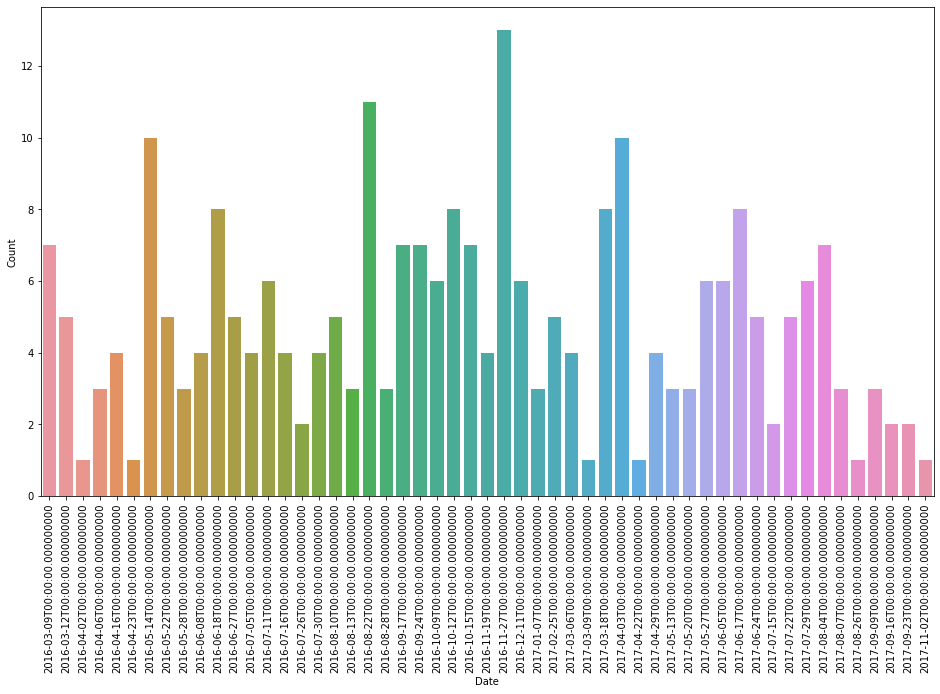

In [38]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_count['Date'], y = price_Ric_count['Count'])
plt.xticks(rotation = 90)

### 3.3 Seller agent analysis 

In [39]:
price_Ric_sel = price_Ric.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Jellis'),
  Text(1, 0, 'Biggin'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Blue'),
  Text(4, 0, 'Marshall'),
  Text(5, 0, 'Nelson'),
  Text(6, 0, 'Collins'),
  Text(7, 0, "Abercromby's"),
  Text(8, 0, 'Rendina'),
  Text(9, 0, 'Peter'),
  Text(10, 0, 'Kay'),
  Text(11, 0, 'RT'),
  Text(12, 0, 'Steveway'),
  Text(13, 0, 'Whiting'),
  Text(14, 0, 'Dingle'),
  Text(15, 0, 'Fletchers'),
  Text(16, 0, 'Woodards'),
  Text(17, 0, 'LITTLE'),
  Text(18, 0, 'Ray'),
  Text(19, 0, 'Domain'),
  Text(20, 0, 'McGrath'),
  Text(21, 0, 'Caine')])

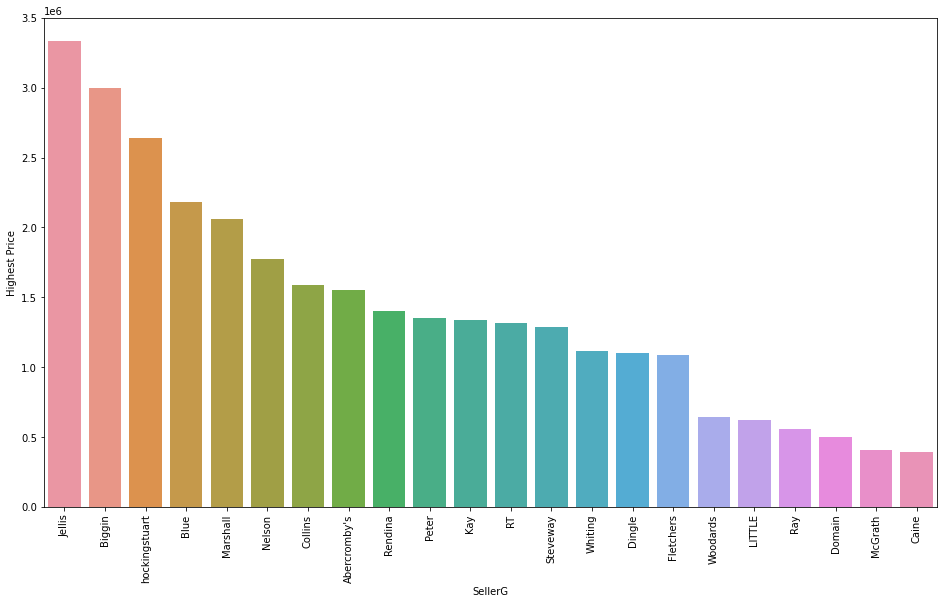

In [40]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_sel['SellerG'], y = price_Ric_sel['Highest Price'])
plt.xticks(rotation = 90)

In [41]:
price_Ric_sell = price_Ric.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Dingle'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'Biggin'),
  Text(3, 0, 'Marshall'),
  Text(4, 0, 'Ray'),
  Text(5, 0, 'Collins'),
  Text(6, 0, 'RT'),
  Text(7, 0, 'LITTLE'),
  Text(8, 0, 'Caine'),
  Text(9, 0, 'hockingstuart'),
  Text(10, 0, 'McGrath'),
  Text(11, 0, 'Domain'),
  Text(12, 0, 'Woodards'),
  Text(13, 0, 'Nelson'),
  Text(14, 0, 'Fletchers'),
  Text(15, 0, "Abercromby's"),
  Text(16, 0, 'Whiting'),
  Text(17, 0, 'Kay'),
  Text(18, 0, 'Steveway'),
  Text(19, 0, 'Peter'),
  Text(20, 0, 'Rendina'),
  Text(21, 0, 'Blue')])

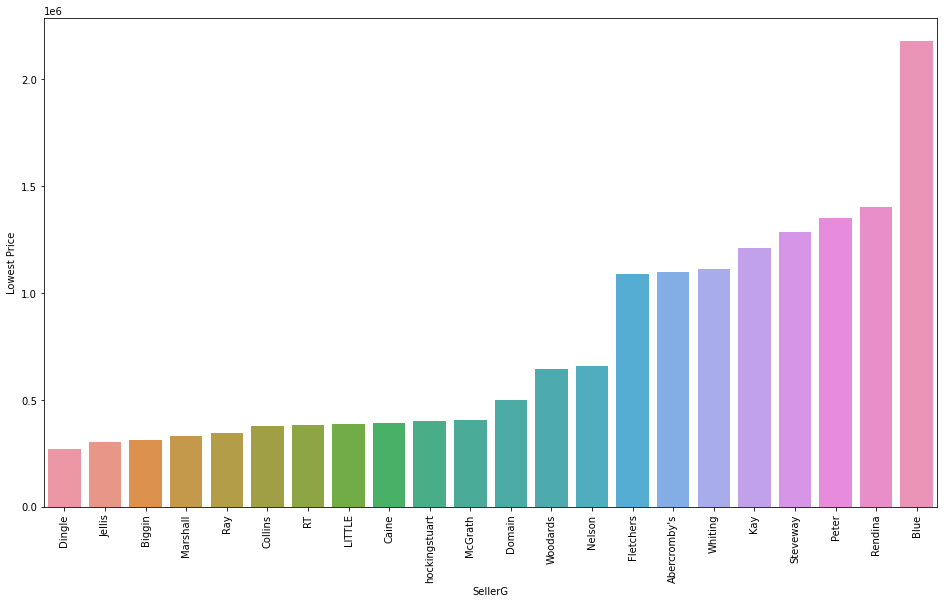

In [42]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_sell['SellerG'], y = price_Ric_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [43]:
price_Ric_selcount = price_Ric.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Biggin'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Marshall'),
  Text(4, 0, 'Nelson'),
  Text(5, 0, 'Collins'),
  Text(6, 0, 'LITTLE'),
  Text(7, 0, 'Dingle'),
  Text(8, 0, 'RT'),
  Text(9, 0, 'Kay'),
  Text(10, 0, 'Ray'),
  Text(11, 0, "Abercromby's"),
  Text(12, 0, 'Domain'),
  Text(13, 0, 'Fletchers'),
  Text(14, 0, 'Caine'),
  Text(15, 0, 'Blue'),
  Text(16, 0, 'McGrath'),
  Text(17, 0, 'Peter'),
  Text(18, 0, 'Rendina'),
  Text(19, 0, 'Steveway'),
  Text(20, 0, 'Whiting'),
  Text(21, 0, 'Woodards')])

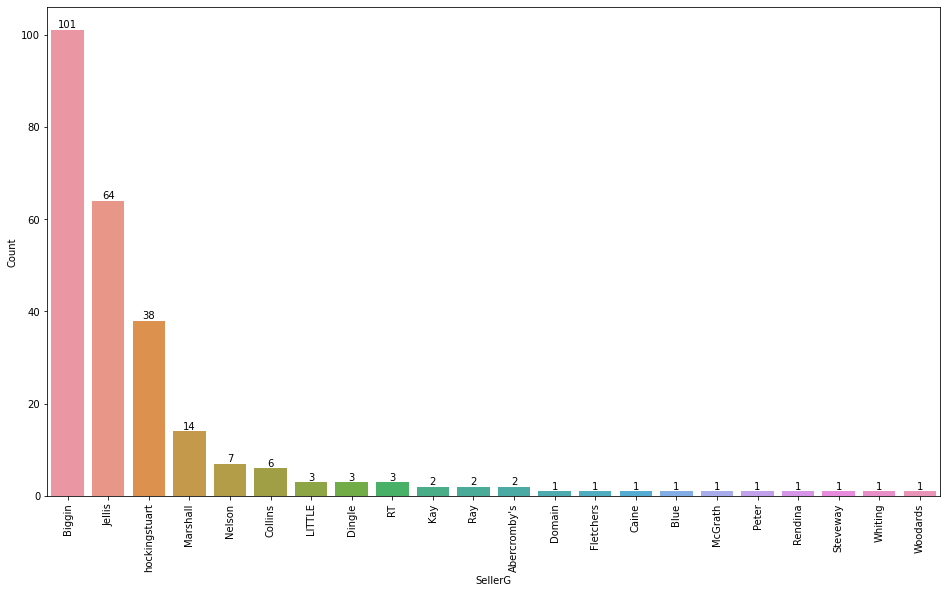

In [44]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_Ric_selcount['SellerG'], y = price_Ric_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

## 4. South Yarra

### 4.1 Median price trend

In [45]:
price_SY_median = price_SY.groupby(['Date'])['Price'].agg('median').reset_index(name = 'SYMedian')

(array([16892., 16983., 17075., 17167., 17257., 17348., 17440., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

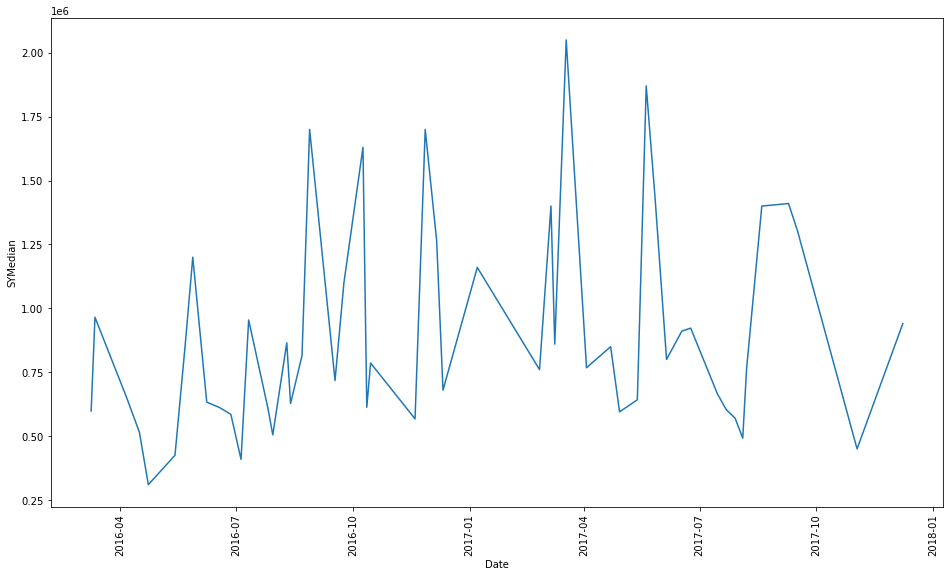

In [46]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_SY_median['Date'], y = price_SY_median['SYMedian'])
plt.xticks(rotation = 90)

In [47]:
price_SYm = pd.merge(price_median, price_SY_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

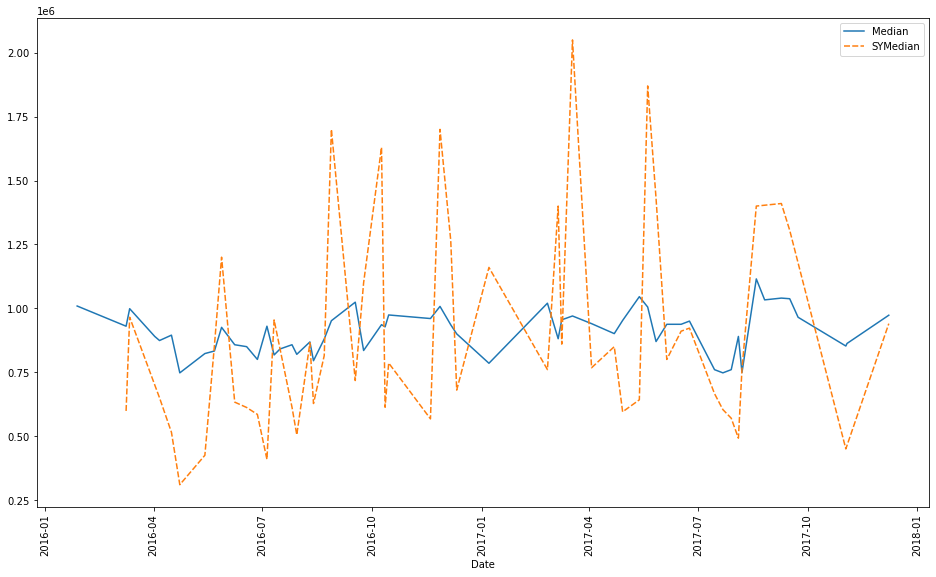

In [48]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_SYm)
plt.xticks(rotation = 90)

### 4.2 Number of property sold during the period

In [49]:
price_SY_count = price_SY.groupby(['Date'])['Address'].count().reset_index(name = 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '2016-03-09T00:00:00.000000000'),
  Text(1, 0, '2016-03-12T00:00:00.000000000'),
  Text(2, 0, '2016-04-06T00:00:00.000000000'),
  Text(3, 0, '2016-04-16T00:00:00.000000000'),
  Text(4, 0, '2016-04-23T00:00:00.000000000'),
  Text(5, 0, '2016-05-14T00:00:00.000000000'),
  Text(6, 0, '2016-05-22T00:00:00.000000000'),
  Text(7, 0, '2016-05-28T00:00:00.000000000'),
  Text(8, 0, '2016-06-08T00:00:00.000000000'),
  Text(9, 0, '2016-06-18T00:00:00.000000000'),
  Text(10, 0, '2016-06-27T00:00:00.000000000'),
  Text(11, 0, '2016-07-05T00:00:00.000000000'),
  Text(12, 0, '2016-07-11T00:00:00.000000000'),
  Text(13, 0, '2016-07-26T00:00:00.000000000'),
  Text(14, 0, '2016-07-30T00:00:00.000000000'),
  Text(15, 0, '2016-08-10T00:00:00.000000000'),


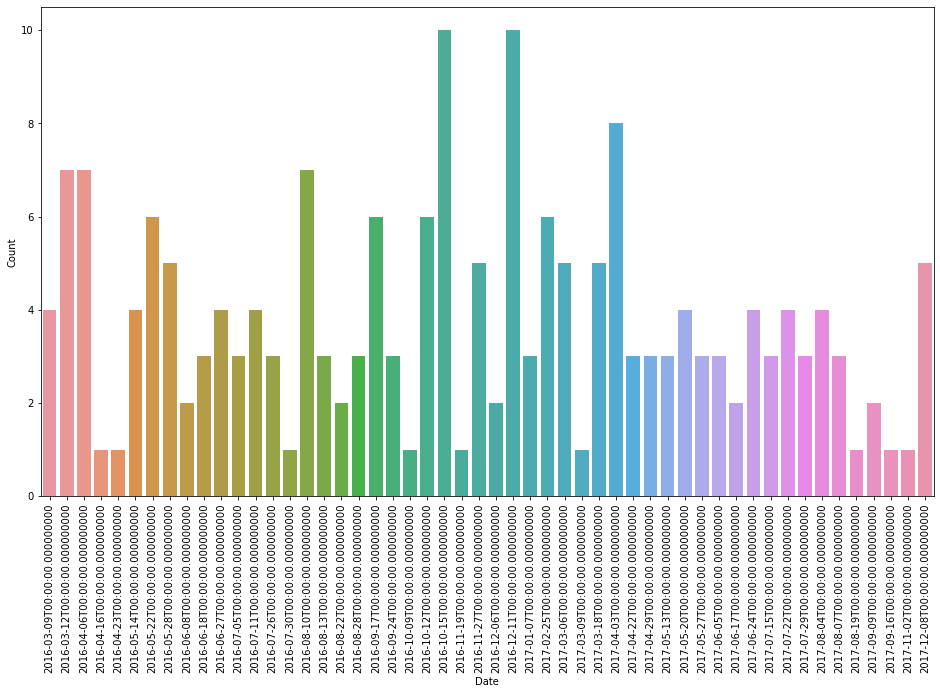

In [50]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_count['Date'], y = price_SY_count['Count'])
plt.xticks(rotation = 90)

### 4.3 Seller agent analysis

In [51]:
price_SY_sel = price_SY.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Castran'),
  Text(1, 0, 'Marshall'),
  Text(2, 0, 'RT'),
  Text(3, 0, 'Kay'),
  Text(4, 0, 'Williams'),
  Text(5, 0, 'Biggin'),
  Text(6, 0, 'Jellis'),
  Text(7, 0, 'hockingstuart'),
  Text(8, 0, "Abercromby's"),
  Text(9, 0, 'Greg'),
  Text(10, 0, 'Morrison'),
  Text(11, 0, 'Beller'),
  Text(12, 0, 'LITTLE'),
  Text(13, 0, 'Thomson'),
  Text(14, 0, 'Fletchers'),
  Text(15, 0, "Sotheby's"),
  Text(16, 0, 'Wilson'),
  Text(17, 0, 'Noel'),
  Text(18, 0, 'Ray'),
  Text(19, 0, 'Harrington'),
  Text(20, 0, 'Buxton'),
  Text(21, 0, 'Dingle'),
  Text(22, 0, 'McGrath'),
  Text(23, 0, 'Gary'),
  Text(24, 0, 'Hodges'),
  Text(25, 0, 'Owen')])

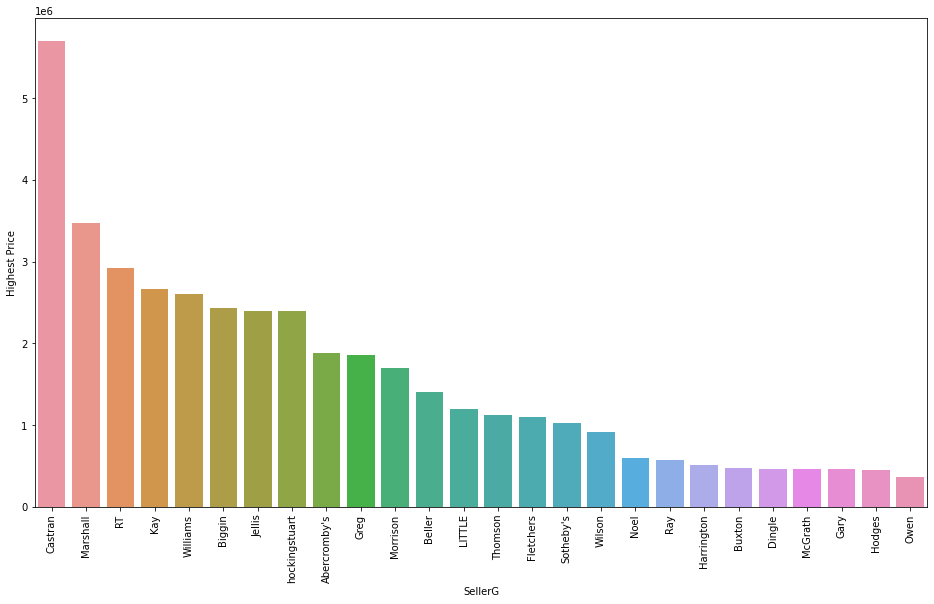

In [52]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_sel['SellerG'], y = price_SY_sel['Highest Price'])
plt.xticks(rotation = 90)

In [53]:
price_SY_sell = price_SY.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Marshall'),
  Text(1, 0, 'hockingstuart'),
  Text(2, 0, 'Buxton'),
  Text(3, 0, 'Jellis'),
  Text(4, 0, 'Owen'),
  Text(5, 0, 'Hodges'),
  Text(6, 0, 'LITTLE'),
  Text(7, 0, 'Castran'),
  Text(8, 0, 'Biggin'),
  Text(9, 0, 'RT'),
  Text(10, 0, 'Gary'),
  Text(11, 0, 'McGrath'),
  Text(12, 0, 'Dingle'),
  Text(13, 0, 'Ray'),
  Text(14, 0, "Abercromby's"),
  Text(15, 0, 'Beller'),
  Text(16, 0, 'Harrington'),
  Text(17, 0, 'Williams'),
  Text(18, 0, 'Kay'),
  Text(19, 0, 'Noel'),
  Text(20, 0, 'Thomson'),
  Text(21, 0, 'Wilson'),
  Text(22, 0, "Sotheby's"),
  Text(23, 0, 'Fletchers'),
  Text(24, 0, 'Morrison'),
  Text(25, 0, 'Greg')])

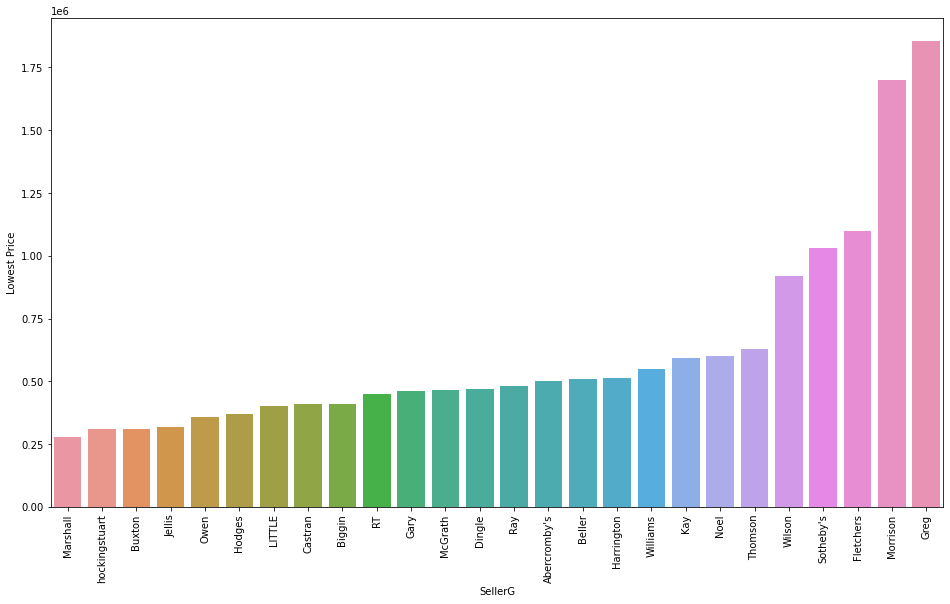

In [54]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_sell['SellerG'], y = price_SY_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [55]:
price_SY_selcount = price_SY.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'hockingstuart'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'Williams'),
  Text(3, 0, 'Kay'),
  Text(4, 0, 'Marshall'),
  Text(5, 0, 'Biggin'),
  Text(6, 0, 'RT'),
  Text(7, 0, 'Castran'),
  Text(8, 0, 'Beller'),
  Text(9, 0, 'LITTLE'),
  Text(10, 0, "Abercromby's"),
  Text(11, 0, 'Hodges'),
  Text(12, 0, 'Ray'),
  Text(13, 0, 'Thomson'),
  Text(14, 0, 'Buxton'),
  Text(15, 0, 'Harrington'),
  Text(16, 0, 'Greg'),
  Text(17, 0, 'Gary'),
  Text(18, 0, 'Fletchers'),
  Text(19, 0, 'McGrath'),
  Text(20, 0, 'Morrison'),
  Text(21, 0, 'Noel'),
  Text(22, 0, 'Owen'),
  Text(23, 0, 'Dingle'),
  Text(24, 0, "Sotheby's"),
  Text(25, 0, 'Wilson')])

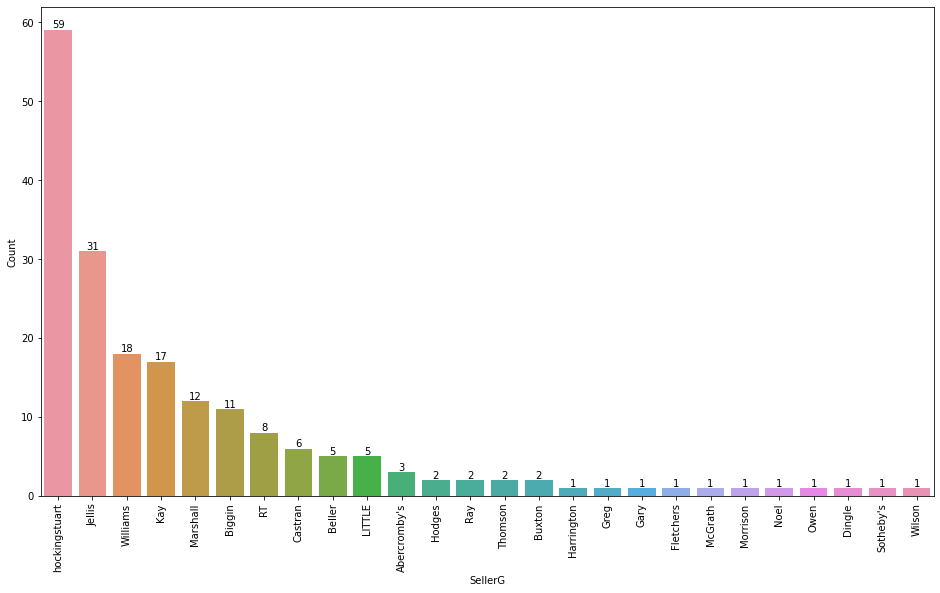

In [56]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_SY_selcount['SellerG'], y = price_SY_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

# Forecast

In [57]:
x = price[['Suburb', 'Rooms', 'Date', 'Bedroom2']]
y = price['Price']

In [58]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [60]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [62]:
print(lin_reg.intercept_)

571821.6616045627


In [63]:
coeff = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Suburb,-744.301225
Rooms,322248.813948
Date,-1475.455213
Bedroom2,19596.303549


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

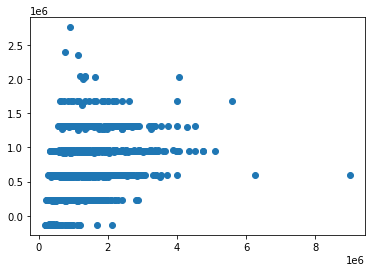

In [65]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

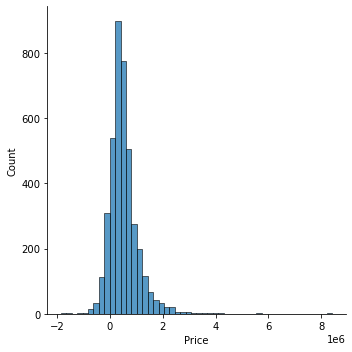

In [66]:
sns.displot((y_test - pred), bins=50);

In [67]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 553704.0546084769
MSE: 556254649249.5071
RMSE: 745824.8113662532
R2 Square -0.41432597648279024
Train set evaluation:
_____________________________________
MAE: 550753.6036635968
MSE: 564432356835.801
RMSE: 751287.133415581
R2 Square -0.3631933688526374


In [68]:
evaluate_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,553704.054608,5.562546e+11,745824.811366,-0.414326,"[0.36162622061911553, 0.29039342487982023, 0.2..."


In [69]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 675930728272374.2
MSE: 9.590838290867741e+32
RMSE: 3.0969078596025004e+16
R2 Square -2.4385543112891244e+21
Train set evaluation:
_____________________________________
MAE: 373922.52140025713
MSE: 287641806292.62665
RMSE: 536322.4834860335
R2 Square 0.3052995665573216


In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 293536.6745027061
MSE: 208844240607.1404
RMSE: 456994.79275713896
R2 Square 0.46899529751703495
Train set evaluation:
_____________________________________
MAE: 134207.02080522003
MSE: 43831555814.86664
RMSE: 209359.8715486486
R2 Square 0.8941398636883913


In [71]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regression,293536.674503,2.088442e+11,456994.792757,0.468995,"[0.4206839155522356, 0.42472882691609626, 0.40..."


## Gradient boost

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 268843.19295090646
MSE: 176861074459.92526
RMSE: 420548.53995695343
R2 Square 0.5615340099149115
Train set evaluation:
_____________________________________
MAE: 240492.07779480575
MSE: 147660131488.98346
RMSE: 384265.70428413653
R2 Square 0.6396396123287875


In [74]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,268843.192951,1.768611e+11,420548.539957,0.561534,"[0.4945266821380947, 0.3479481886476362, 0.377..."


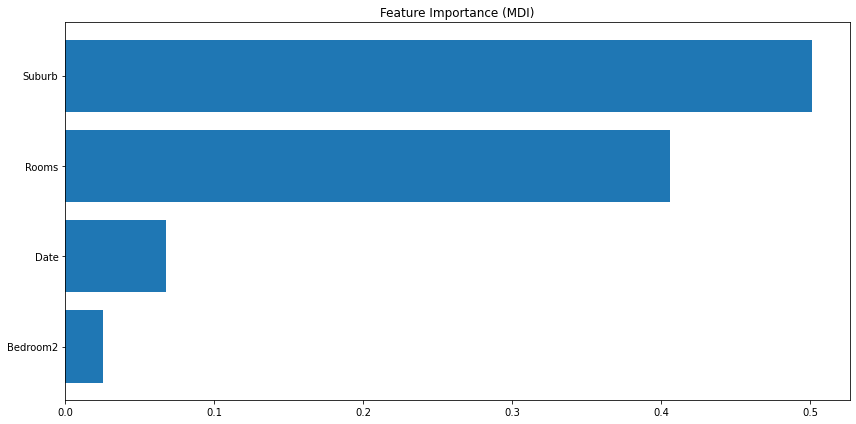

In [75]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()